In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

merge_df = pd.read_csv("/Users/apple/Desktop/Crescent-main-2/merged_dpd_data1.csv")
merge_df.drop(columns="Unnamed: 0",inplace=True)
merge_df

PullDate  Veh_Value  ApplicantFICOScore     DTI     LTV  PTI_BOOKED  \
0      2019-06-30    12975.0                 0.0  0.2598  1.1605      0.0964   
1      2019-06-30    16275.0                 0.0  0.2733  1.2347      0.1006   
2      2019-06-30    16575.0               551.0  0.2710  1.1321      0.1525   
3      2019-06-30    11600.0               468.0  0.2678  1.2997      0.0903   
4      2019-06-30     7850.0               523.0  0.3512  1.2994      0.1354   
...           ...        ...                 ...     ...     ...         ...   
63003         NaN        NaN                 NaN     NaN     NaN         NaN   
63004         NaN        NaN                 NaN     NaN     NaN         NaN   
63005         NaN        NaN                 NaN     NaN     NaN         NaN   
63006         NaN        NaN                 NaN     NaN     NaN         NaN   
63007         NaN        NaN                 NaN     NaN     NaN         NaN   

       SalesTax  AMOUNT_FINANCED  Appl_Debt  Appl_Income  PTI_Approved  \
0        708.22       15057.2197    1075.05      4138.00        0.0754   
1          0.00       20095.1699    1138.75      4166.67        0.0732   
2       1916.82       18764.8203     767.83      2833.33        0.1299   
3          0.00       15077.0000    1071.20      4000.00        0.0678   
4        880.60       10200.5400     726.64      2069.02        0.0947   
...         ...              ...        ...          ...           ...   
63003       NaN              NaN        NaN          NaN           NaN   
63004       NaN              NaN        NaN          NaN           NaN   
63005       NaN              NaN        NaN          NaN           NaN   
63006       NaN              NaN        NaN          NaN           NaN   
63007       NaN              NaN        NaN          NaN           NaN   

       CUSTOM_SCORE  DTI_RATIO   MOB  DOWN_CASH  FINANCED_AMOUNT  \
0             561.0     0.2598  26.0        0.0         15057.22   
1             686.0     0.2733  18.0     3500.0         20095.17   
2             507.0     0.2710  15.0     5000.0         18764.82   
3             587.0     0.2678  15.0     3000.0         15077.00   
4             495.0     0.3512  15.0     3000.0         10200.54   
...             ...        ...   ...        ...              ...   
63003           NaN        NaN   NaN        NaN              NaN   
63004           NaN        NaN   NaN        NaN              NaN   
63005           NaN        NaN   NaN        NaN              NaN   
63006           NaN        NaN   NaN        NaN              NaN   
63007           NaN        NaN   NaN        NaN              NaN   

       BACKEND_TOTAL  LINE4_LTV  ContactCount  F0066_CONTACT_NO_PROMISE_COUNT  \
0             1350.0     1.0564           7.0                            12.0   
1             2300.0     1.0934           3.0                             3.0   
2                0.0     1.1321           2.0                             0.0   
3             2790.0     1.0592           4.0                            14.0   
4             1450.0     1.1147           2.0                             2.0   
...              ...        ...           ...                             ...   
63003            NaN        NaN           NaN                             NaN   
63004            NaN        NaN           NaN                             NaN   
63005            NaN        NaN           NaN                             NaN   
63006            NaN        NaN           NaN                             NaN   
63007            NaN        NaN           NaN                             NaN   

       DSL_NSF  F0315_DAYS_SINCE_LAST_PROMISE_1  F0065_PROMISES_TAKEN_COUNT  \
0          NaN                              5.0                        25.0   
1          NaN                             45.0                         3.0   
2          NaN                              3.0                         3.0   
3         43.0                            -11.0      

In [15]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63008 entries, 0 to 63007
Data columns (total 91 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   PullDate                                   62938 non-null  object 
 1   Veh_Value                                  62938 non-null  float64
 2   ApplicantFICOScore                         62938 non-null  float64
 3   DTI                                        62938 non-null  float64
 4   LTV                                        62938 non-null  float64
 5   PTI_BOOKED                                 62938 non-null  float64
 6   SalesTax                                   62938 non-null  float64
 7   AMOUNT_FINANCED                            62938 non-null  float64
 8   Appl_Debt                                  62938 non-null  float64
 9   Appl_Income                                62938 non-null  float64
 10  PTI_Approved          

In [16]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [17]:
merge_df["DPD_bool"]=pd.cut(merge_df["DPD"],[-np.inf,30.0,np.inf],labels=[False,True])
merge_df["DPD_bool"]

0        False
1        False
2        False
3        False
4        False
         ...  
63003    False
63004     True
63005     True
63006    False
63007    False
Name: DPD_bool, Length: 63008, dtype: category
Categories (2, object): [False < True]

In [11]:
!pip install plotly

     |████████████████████████████████| 28.8 MB 1.0 MB/s eta 0:00:01


In [18]:
import seaborn as sns
import plotly.express as px

In [19]:
px.box(data_frame=merge_df,x="DPD_bool",y="Appl_Income")

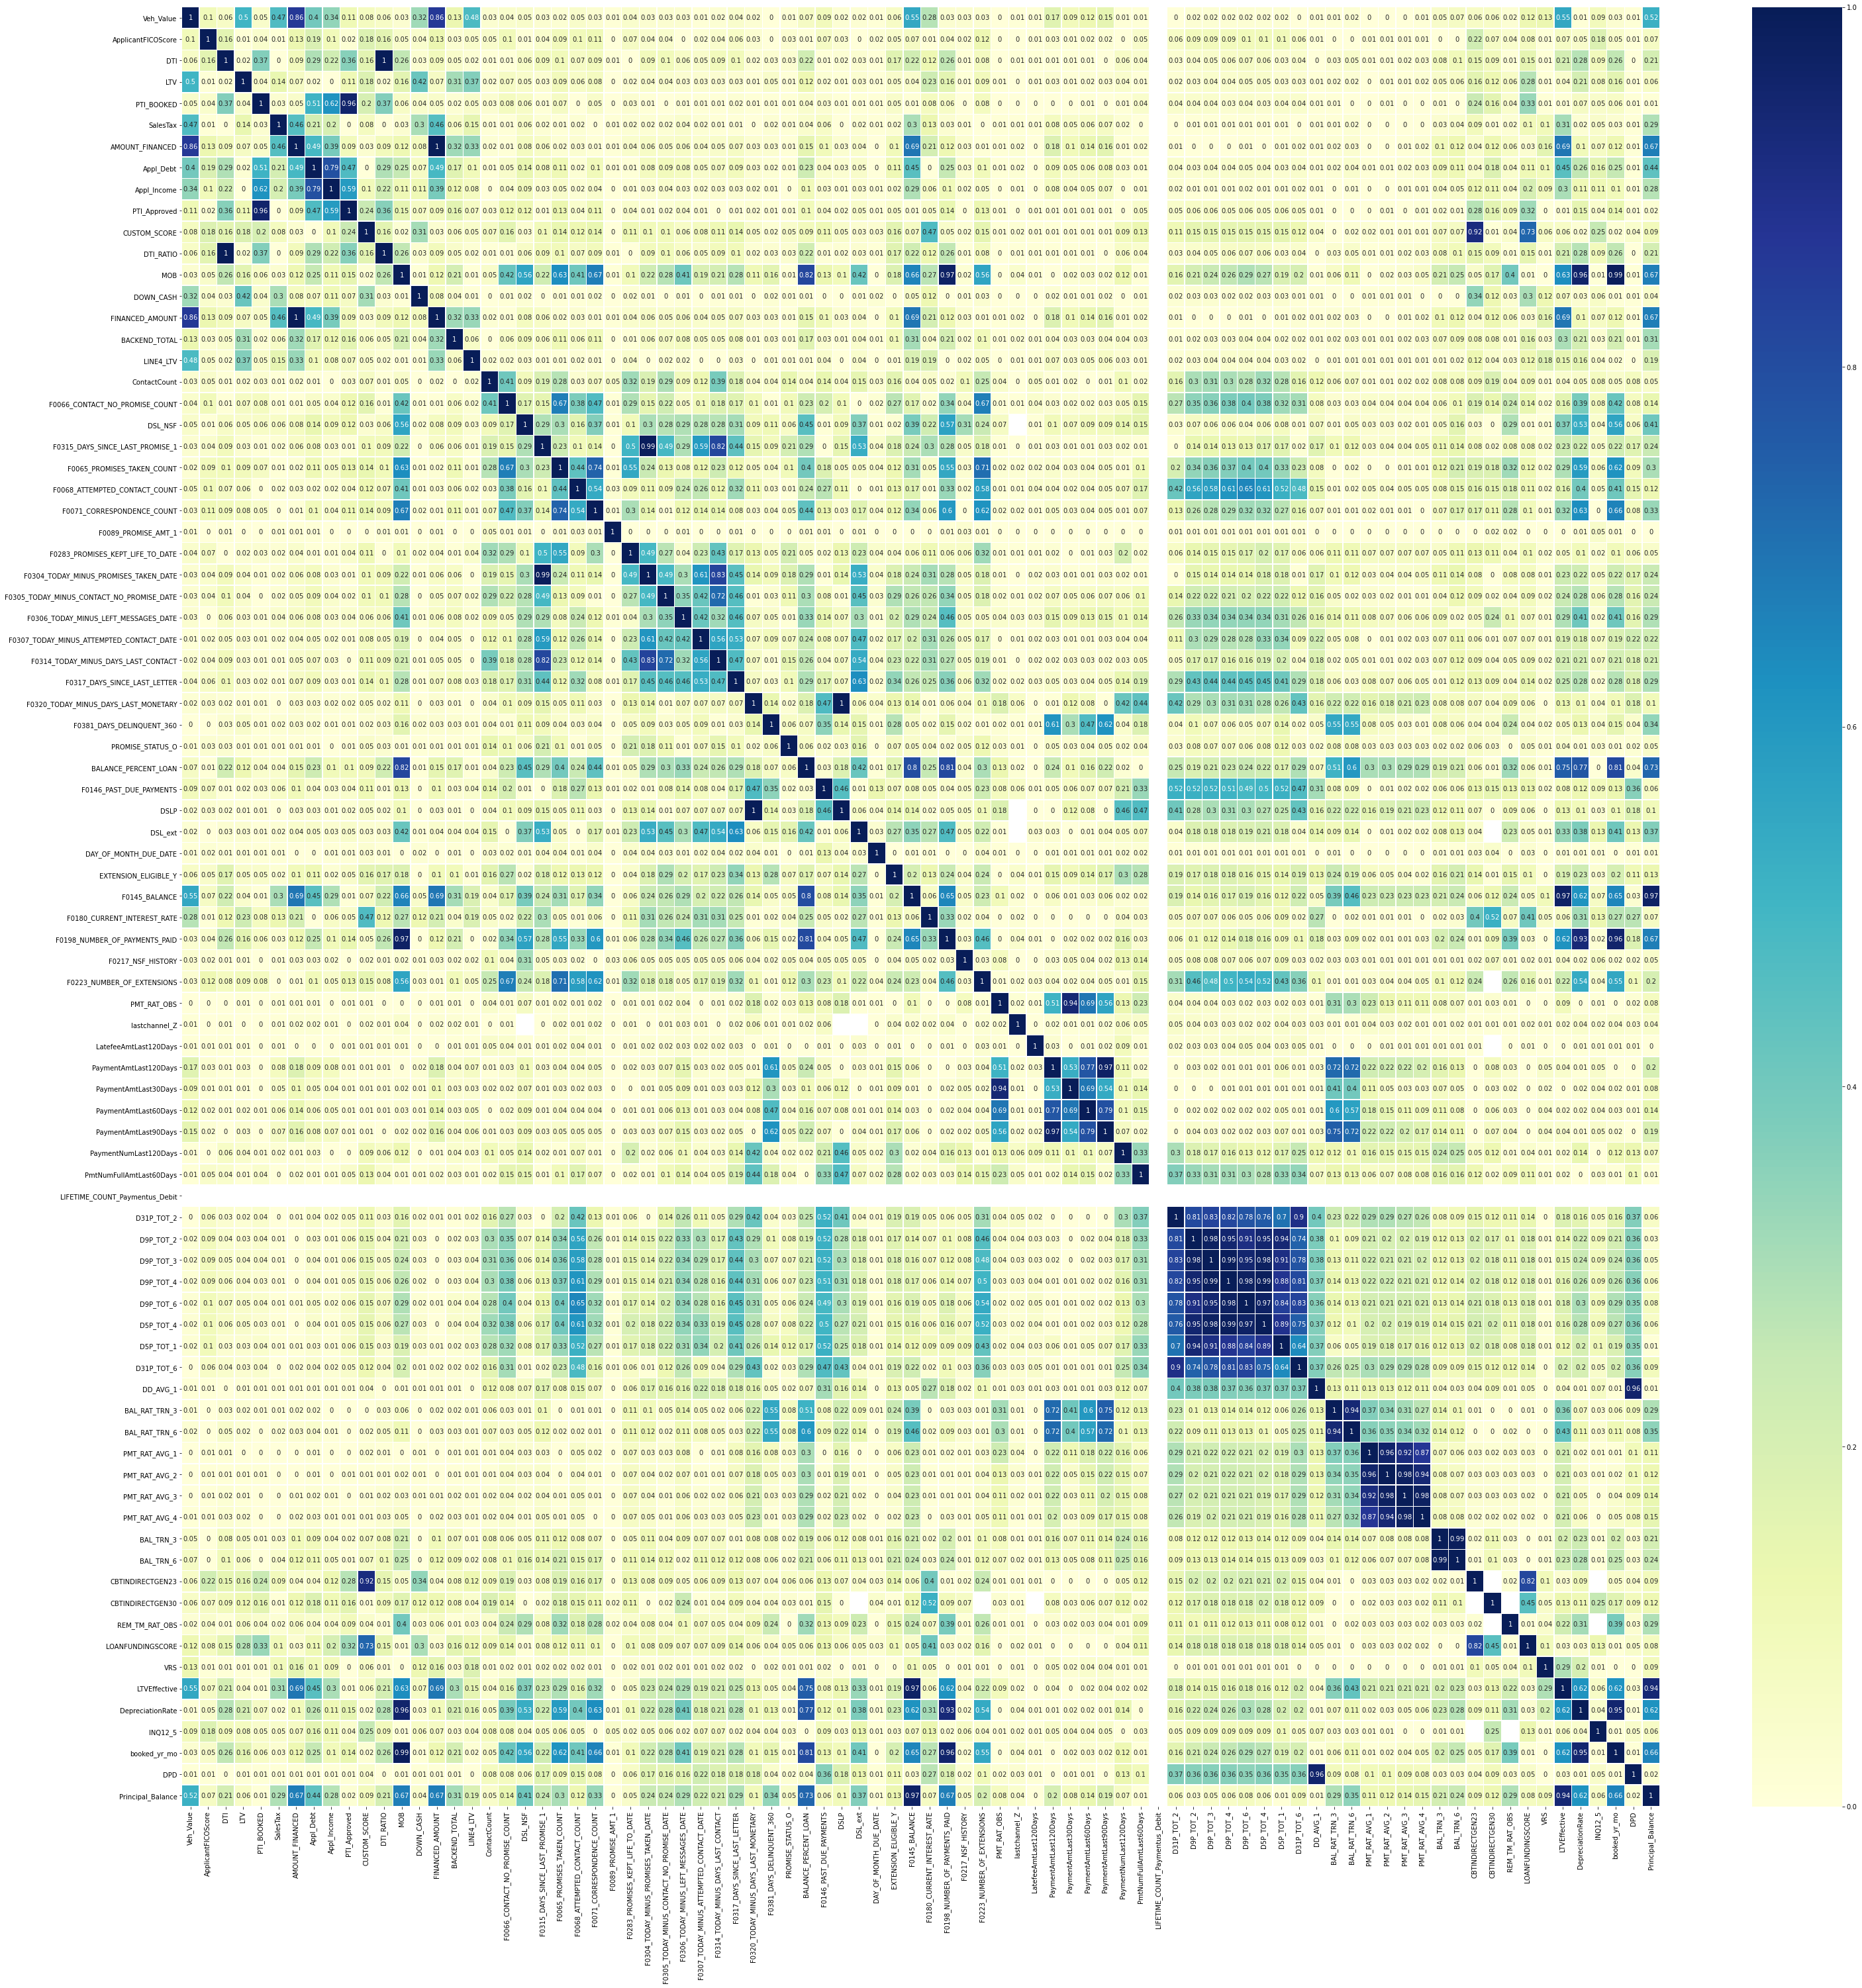

In [20]:
corr_matrix=merge_df.corr()
fig,ax=plt.subplots(figsize=(50,50))
sns.heatmap(corr_matrix.abs().round(2),linewidths=0.5,cmap='YlGnBu',annot=True)
fig.savefig('../correlation_image.png')
plt.show()

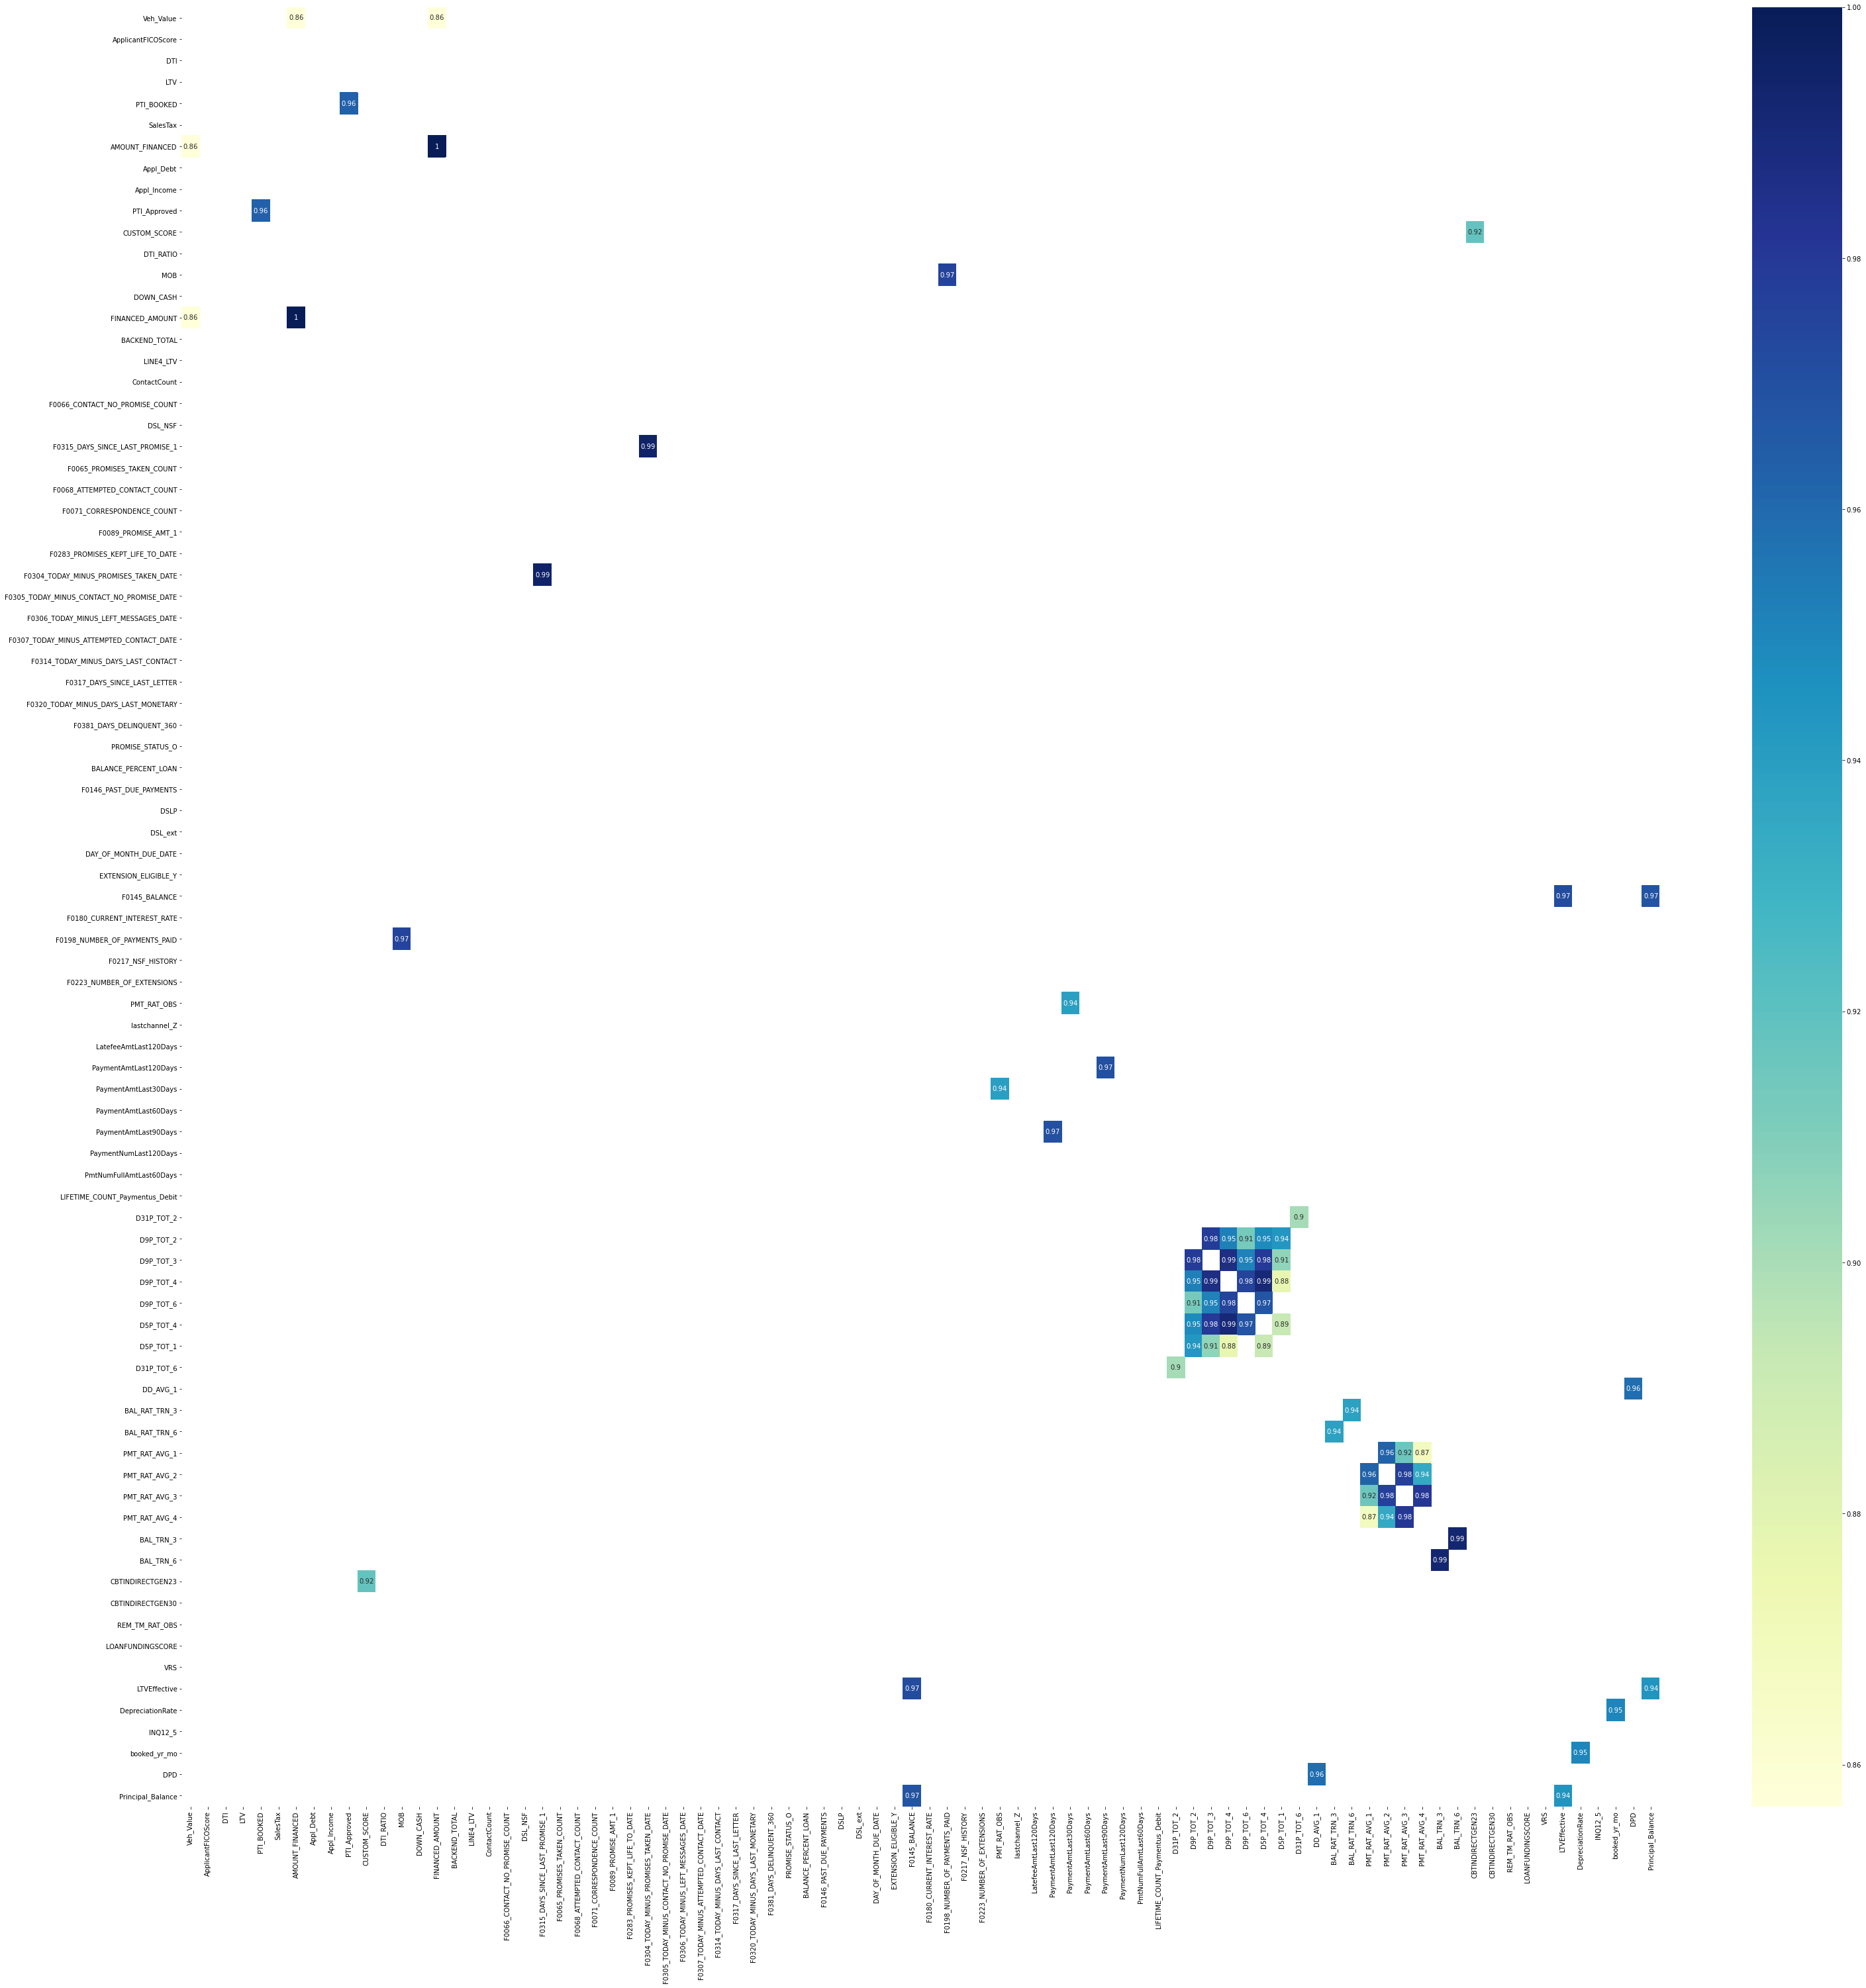

In [21]:
filteredDf = corr_matrix[(corr_matrix >= .85) & (corr_matrix !=1.000)]
plt.figure(figsize=(50,50))
sns.heatmap(filteredDf, annot=True, cmap="YlGnBu")
fig.savefig('../correlation_image_above_threshold.png')
plt.show()

In [22]:
filteredDf=corr_matrix[(corr_matrix>0.85) & (corr_matrix != 1.0)]
filteredDf

Veh_Value  ApplicantFICOScore  DTI  \
Veh_Value                                        NaN                 NaN  NaN   
ApplicantFICOScore                               NaN                 NaN  NaN   
DTI                                              NaN                 NaN  NaN   
LTV                                              NaN                 NaN  NaN   
PTI_BOOKED                                       NaN                 NaN  NaN   
SalesTax                                         NaN                 NaN  NaN   
AMOUNT_FINANCED                             0.856686                 NaN  NaN   
Appl_Debt                                        NaN                 NaN  NaN   
Appl_Income                                      NaN                 NaN  NaN   
PTI_Approved                                     NaN                 NaN  NaN   
CUSTOM_SCORE                                     NaN                 NaN  NaN   
DTI_RATIO                                        NaN                 NaN  NaN   
MOB                                              NaN                 NaN  NaN   
DOWN_CASH                                        NaN                 NaN  NaN   
FINANCED_AMOUNT                             0.856686                 NaN  NaN   
BACKEND_TOTAL                                    NaN                 NaN  NaN   
LINE4_LTV                                        NaN                 NaN  NaN   
ContactCount                                     NaN                 NaN  NaN   
F0066_CONTACT_NO_PROMISE_COUNT                   NaN                 NaN  NaN   
DSL_NSF                                          NaN                 NaN  NaN   
F0315_DAYS_SINCE_LAST_PROMISE_1                  NaN                 NaN  NaN   
F0065_PROMISES_TAKEN_COUNT                       NaN                 NaN  NaN   
F0068_ATTEMPTED_CONTACT_COUNT                    NaN                 NaN  NaN   
F0071_CORRESPONDENCE_COUNT                       NaN                 NaN  NaN   
F0089_PROMISE_AMT_1                              NaN                 NaN  NaN   
F0283_PROMISES_KEPT_LIFE_TO_DATE                 NaN                 NaN  NaN   
F0304_TODAY_MINUS_PROMISES_TAKEN_DATE            NaN                 NaN  NaN   
F0305_TODAY_MINUS_CONTACT_NO_PROMISE_DATE        NaN                 NaN  NaN   
F0306_TODAY_MINUS_LEFT_MESSAGES_DATE             NaN                 NaN  NaN   
F0307_TODAY_MINUS_ATTEMPTED_CONTACT_DATE         NaN                 NaN  NaN   
F0314_TODAY_MINUS_DAYS_LAST_CONTACT              NaN                 NaN  NaN   
F0317_DAYS_SINCE_LAST_LETTER                     NaN                 NaN  NaN   
F0320_TODAY_MINUS_DAYS_LAST_MONETARY             NaN                 NaN  NaN   
F0381_DAYS_DELINQUENT_360                        NaN                 NaN  NaN   
PROMISE_STATUS_O                                 NaN                 NaN  NaN   
BALANCE_PERCENT_LOAN                             NaN                 NaN  NaN   
F0146_PAST_DUE_PAYMENTS                          NaN                 NaN  NaN   
DSLP                                             NaN                 NaN  NaN   
DSL_ext                                          NaN                 NaN  NaN   
DAY_OF_MONTH_DUE_DATE                            NaN                 NaN  NaN   
EXTENSION_ELIGIBLE_Y                             NaN                 NaN  NaN   
F0145_BALANCE                                    NaN                 NaN  NaN   
F0180_CURRENT_INTEREST_RATE                      NaN                 NaN  NaN   
F0198_NUMBER_OF_PAYMENTS_PAID                    NaN                 NaN  NaN   
F0217_NSF_HISTORY                                NaN                 NaN  NaN   
F0223_NUMBER_OF_EXTENSIONS                       NaN                 NaN  NaN   
PMT_RAT_OBS                                      NaN                 NaN  NaN   
lastchannel_Z                                    NaN                 NaN  NaN   
LatefeeAmtLast120Days                            NaN                 NaN  

In [23]:
filteredDf= filteredDf.mask(np.tril(np.ones(filteredDf.shape)).astype(np.bool))
filteredDf

<ipython-input-23-78ffae0cd58b>:1: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Veh_Value  ApplicantFICOScore  DTI  \
Veh_Value                                        NaN                 NaN  NaN   
ApplicantFICOScore                               NaN                 NaN  NaN   
DTI                                              NaN                 NaN  NaN   
LTV                                              NaN                 NaN  NaN   
PTI_BOOKED                                       NaN                 NaN  NaN   
SalesTax                                         NaN                 NaN  NaN   
AMOUNT_FINANCED                                  NaN                 NaN  NaN   
Appl_Debt                                        NaN                 NaN  NaN   
Appl_Income                                      NaN                 NaN  NaN   
PTI_Approved                                     NaN                 NaN  NaN   
CUSTOM_SCORE                                     NaN                 NaN  NaN   
DTI_RATIO                                        NaN                 NaN  NaN   
MOB                                              NaN                 NaN  NaN   
DOWN_CASH                                        NaN                 NaN  NaN   
FINANCED_AMOUNT                                  NaN                 NaN  NaN   
BACKEND_TOTAL                                    NaN                 NaN  NaN   
LINE4_LTV                                        NaN                 NaN  NaN   
ContactCount                                     NaN                 NaN  NaN   
F0066_CONTACT_NO_PROMISE_COUNT                   NaN                 NaN  NaN   
DSL_NSF                                          NaN                 NaN  NaN   
F0315_DAYS_SINCE_LAST_PROMISE_1                  NaN                 NaN  NaN   
F0065_PROMISES_TAKEN_COUNT                       NaN                 NaN  NaN   
F0068_ATTEMPTED_CONTACT_COUNT                    NaN                 NaN  NaN   
F0071_CORRESPONDENCE_COUNT                       NaN                 NaN  NaN   
F0089_PROMISE_AMT_1                              NaN                 NaN  NaN   
F0283_PROMISES_KEPT_LIFE_TO_DATE                 NaN                 NaN  NaN   
F0304_TODAY_MINUS_PROMISES_TAKEN_DATE            NaN                 NaN  NaN   
F0305_TODAY_MINUS_CONTACT_NO_PROMISE_DATE        NaN                 NaN  NaN   
F0306_TODAY_MINUS_LEFT_MESSAGES_DATE             NaN                 NaN  NaN   
F0307_TODAY_MINUS_ATTEMPTED_CONTACT_DATE         NaN                 NaN  NaN   
F0314_TODAY_MINUS_DAYS_LAST_CONTACT              NaN                 NaN  NaN   
F0317_DAYS_SINCE_LAST_LETTER                     NaN                 NaN  NaN   
F0320_TODAY_MINUS_DAYS_LAST_MONETARY             NaN                 NaN  NaN   
F0381_DAYS_DELINQUENT_360                        NaN                 NaN  NaN   
PROMISE_STATUS_O                                 NaN                 NaN  NaN   
BALANCE_PERCENT_LOAN                             NaN                 NaN  NaN   
F0146_PAST_DUE_PAYMENTS                          NaN                 NaN  NaN   
DSLP                                             NaN                 NaN  NaN   
DSL_ext                                          NaN                 NaN  NaN   
DAY_OF_MONTH_DUE_DATE                            NaN                 NaN  NaN   
EXTENSION_ELIGIBLE_Y                             NaN                 NaN  NaN   
F0145_BALANCE                                    NaN                 NaN  NaN   
F0180_CURRENT_INTEREST_RATE                      NaN                 NaN  NaN   
F0198_NUMBER_OF_PAYMENTS_PAID                    NaN                 NaN  NaN   
F0217_NSF_HISTORY                                NaN                 NaN  NaN   
F0223_NUMBER_OF_EXTENSIONS                       NaN                 NaN  NaN   
PMT_RAT_OBS                                      NaN                 NaN  NaN   
lastchannel_Z                                    NaN                 NaN  NaN   
LatefeeAmtLast120Days                            NaN                 NaN  

In [24]:
merge_df["PTI_Approved"].isnull().sum(),merge_df["PTI_Approved"].isnull().sum()

(70, 70)

In [25]:
corr_helpful=filteredDf.unstack().sort_values(ascending=False)
corr_helpful=corr_helpful.dropna()
corr_helpful

FINANCED_AMOUNT                        AMOUNT_FINANCED                    1.000000
F0304_TODAY_MINUS_PROMISES_TAKEN_DATE  F0315_DAYS_SINCE_LAST_PROMISE_1    0.994605
BAL_TRN_6                              BAL_TRN_3                          0.992183
D5P_TOT_4                              D9P_TOT_4                          0.990546
D9P_TOT_4                              D9P_TOT_3                          0.986578
PMT_RAT_AVG_4                          PMT_RAT_AVG_3                      0.980580
D5P_TOT_4                              D9P_TOT_3                          0.979517
D9P_TOT_3                              D9P_TOT_2                          0.978545
PMT_RAT_AVG_3                          PMT_RAT_AVG_2                      0.976694
D9P_TOT_6                              D9P_TOT_4                          0.975888
F0198_NUMBER_OF_PAYMENTS_PAID          MOB                                0.974901
LTVEffective                           F0145_BALANCE                      0.971846
Paym

In [26]:
def select_columns_from_correlation(df,threshold):
    corr_data=df.corr().abs()
    fil_corr = corr_data[(corr_data>threshold) & (corr_data!=1.000)]
    fil_corr = fil_corr.mask(np.tril(np.ones(fil_corr.shape)).astype(np.bool))
    fil_corr_convert=fil_corr.unstack().sort_values(ascending=False).dropna()
    imp_colum_after_corr = df.columns.to_list()
    for i in range(fil_corr_convert.shape[0]):
        index=fil_corr_convert.index[i]
        column_remove=index[0]
        if (merge_df[index[0]].isnull().sum() >= merge_df[index[1]].isnull().sum()):
            column_remove=index[1]
        try:
            imp_colum_after_corr.remove(column_remove)
            print(str(column_remove)+" column removed successfully")
        except:
            print(str(column_remove)+" not found in list")
    return imp_colum_after_corr

In [27]:
imp_column=select_columns_from_correlation(merge_df,0.86)
imp_column

AMOUNT_FINANCED column removed successfully
F0304_TODAY_MINUS_PROMISES_TAKEN_DATE column removed successfully
BAL_TRN_3 column removed successfully
D9P_TOT_4 column removed successfully
MOB column removed successfully
D9P_TOT_3 column removed successfully
PMT_RAT_AVG_3 column removed successfully
D9P_TOT_3 not found in list
D9P_TOT_2 column removed successfully
PMT_RAT_AVG_2 column removed successfully
D9P_TOT_4 not found in list
MOB not found in list
F0145_BALANCE column removed successfully
PaymentAmtLast120Days column removed successfully
Principal_Balance column removed successfully
D9P_TOT_6 column removed successfully
F0198_NUMBER_OF_PAYMENTS_PAID column removed successfully
PTI_BOOKED column removed successfully
PMT_RAT_AVG_1 column removed successfully
DPD column removed successfully
MOB not found in list
D9P_TOT_2 not found in list
D9P_TOT_3 not found in list
booked_yr_mo column removed successfully
D9P_TOT_2 not found in list
Principal_Balance not found in list
D9P_TOT_2 not 

<ipython-input-26-c3f5838e7514>:4: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



['PullDate',
 'Veh_Value',
 'ApplicantFICOScore',
 'DTI',
 'LTV',
 'SalesTax',
 'Appl_Debt',
 'Appl_Income',
 'PTI_Approved',
 'DTI_RATIO',
 'DOWN_CASH',
 'FINANCED_AMOUNT',
 'BACKEND_TOTAL',
 'LINE4_LTV',
 'ContactCount',
 'F0066_CONTACT_NO_PROMISE_COUNT',
 'DSL_NSF',
 'F0315_DAYS_SINCE_LAST_PROMISE_1',
 'F0065_PROMISES_TAKEN_COUNT',
 'F0068_ATTEMPTED_CONTACT_COUNT',
 'F0071_CORRESPONDENCE_COUNT',
 'F0089_PROMISE_AMT_1',
 'F0283_PROMISES_KEPT_LIFE_TO_DATE',
 'F0305_TODAY_MINUS_CONTACT_NO_PROMISE_DATE',
 'F0306_TODAY_MINUS_LEFT_MESSAGES_DATE',
 'F0307_TODAY_MINUS_ATTEMPTED_CONTACT_DATE',
 'F0314_TODAY_MINUS_DAYS_LAST_CONTACT',
 'F0317_DAYS_SINCE_LAST_LETTER',
 'F0320_TODAY_MINUS_DAYS_LAST_MONETARY',
 'F0381_DAYS_DELINQUENT_360',
 'F0385_LAST_NSF_DATE',
 'PROMISE_STATUS_O',
 'BALANCE_PERCENT_LOAN',
 'F0146_PAST_DUE_PAYMENTS',
 'DSLP',
 'DSL_ext',
 'DAY_OF_MONTH_DUE_DATE',
 'EXTENSION_ELIGIBLE_Y',
 'F0180_CURRENT_INTEREST_RATE',
 'F0217_NSF_HISTORY',
 'F0223_NUMBER_OF_EXTENSIONS',
 'PMT_

In [28]:
len(imp_column)

69

# FInally we removed some 16 columns with the help of correlation matrix.

### Let's remove date columns due to it's high cardinality or no uniqueness

In [29]:
print("\n\n No. of different values in each column with datatype")
column_metadata=pd.DataFrame(columns=["Name","#Unique_values","Column_type"])
for i,col in enumerate(imp_column):
    column_metadata.loc[i,"Name"]=col
    column_metadata.loc[i,"#Unique_values"]=merge_df[col].nunique()
    column_metadata.loc[i,"Column_type"]=merge_df[col].dtype
column_metadata



 No. of different values in each column with datatype


Name #Unique_values Column_type
0                                    PullDate              1      object
1                                   Veh_Value          10470     float64
2                          ApplicantFICOScore            391     float64
3                                         DTI          16034     float64
4                                         LTV          19406     float64
5                                    SalesTax          40832     float64
6                                   Appl_Debt          51423     float64
7                                 Appl_Income          32130     float64
8                                PTI_Approved          13479     float64
9                                   DTI_RATIO          16034     float64
10                                  DOWN_CASH           2723     float64
11                            FINANCED_AMOUNT          58030     float64
12                              BACKEND_TOTAL           3650     float64
13                                  LINE4_LTV          16851     float64
14                               ContactCount             33     float64
15             F0066_CONTACT_NO_PROMISE_COUNT            148     float64
16                                    DSL_NSF           1321     float64
17            F0315_DAYS_SINCE_LAST_PROMISE_1           1512     float64
18                 F0065_PROMISES_TAKEN_COUNT            124     float64
19              F0068_ATTEMPTED_CONTACT_COUNT           1553     float64
20                 F0071_CORRESPONDENCE_COUNT            239     float64
21                        F0089_PROMISE_AMT_1          30223     float64
22           F0283_PROMISES_KEPT_LIFE_TO_DATE             27     float64
23  F0305_TODAY_MINUS_CONTACT_NO_PROMISE_DATE           1382     float64
24       F0306_TODAY_MINUS_LEFT_MESSAGES_DATE           1438     float64
25   F0307_TODAY_MINUS_ATTEMPTED_CONTACT_DATE           1275     float64
26        F0314_TODAY_MINUS_DAYS_LAST_CONTACT           1275     float64
27               F0317_DAYS_SINCE_LAST_LETTER           1634     float64
28       F0320_TODAY_MINUS_DAYS_LAST_MONETARY            373     float64
29                  F0381_DAYS_DELINQUENT_360           1060     float64
30                        F0385_LAST_NSF_DATE           1321      object
31                           PROMISE_STATUS_O              2     float64
32                       BALANCE_PERCENT_LOAN           9159     float64
33                    F0146_PAST_DUE_PAYMENTS          20956     float64
34                                       DSLP            372     float64
35                                    DSL_ext           1284     float64
36                      DAY_OF_MONTH_DUE_DATE             31     float64
37                       EXTENSION_ELIGIBLE_Y              2     float64
38                F0180_CURRENT_INTEREST_RATE            802     float64
39                          F0217_NSF_HISTORY            955     float64
40                 F0223_NUMBER_OF_EXTENSIONS              7     float64
41                                PMT_RAT_OBS           7680     float64
42                              lastchannel_Z              2     float64
43                      LatefeeAmtLast120Days            188     float64
44                       PaymentAmtLast60Days          36807     float64
45                       PaymentAmtLast90Days          42656     float64
46                      PaymentNumLast120Days             24     float64
47                    PmtNumFullAmtLast60Days             13     float64
48             LIFETIME_COUNT_Paymentus_Debit              1     float64
49                                  D5P_TOT_1             31     float64
50                                 D31P_TOT_6            181     float64
51                                   DD_AVG_1           1067     float64
52                              BAL_RAT_TRN_6            130     float64
53                              PMT_RAT_AVG_4           1113     float64
54                        

## from above observations
- Removed the following columns that have high cardinality being in object data type.
__["ApplicantFICOScore_bins","Business_Date","Masked_Account","masked_account","F0385_LAST_NSF_DATE"]__
- There are few columns which have only 1 unique value that can be eliminated too.
__["LIFETIME_COUNT_Paymentus_Debit","PullDate"]__
- Few columns that have less than 10 unique values which can be observed now for better understanding of columns

In [30]:
def remove_from_list(total_list,remove_list):
    for e in remove_list:
        if e in total_list:
            total_list.remove(e)
    return total_list

In [31]:
imp_column=remove_from_list(imp_column,["ApplicantFICOScore_bins"
                   ,"Business_Date"
                   ,"Masked_Account"
                   ,"masked_account"
                   ,"F0385_LAST_NSF_DATE"
                   ,"LIFETIME_COUNT_Paymentus_Debit"
                   ,"PullDate"])

imp_column


['Veh_Value',
 'ApplicantFICOScore',
 'DTI',
 'LTV',
 'SalesTax',
 'Appl_Debt',
 'Appl_Income',
 'PTI_Approved',
 'DTI_RATIO',
 'DOWN_CASH',
 'FINANCED_AMOUNT',
 'BACKEND_TOTAL',
 'LINE4_LTV',
 'ContactCount',
 'F0066_CONTACT_NO_PROMISE_COUNT',
 'DSL_NSF',
 'F0315_DAYS_SINCE_LAST_PROMISE_1',
 'F0065_PROMISES_TAKEN_COUNT',
 'F0068_ATTEMPTED_CONTACT_COUNT',
 'F0071_CORRESPONDENCE_COUNT',
 'F0089_PROMISE_AMT_1',
 'F0283_PROMISES_KEPT_LIFE_TO_DATE',
 'F0305_TODAY_MINUS_CONTACT_NO_PROMISE_DATE',
 'F0306_TODAY_MINUS_LEFT_MESSAGES_DATE',
 'F0307_TODAY_MINUS_ATTEMPTED_CONTACT_DATE',
 'F0314_TODAY_MINUS_DAYS_LAST_CONTACT',
 'F0317_DAYS_SINCE_LAST_LETTER',
 'F0320_TODAY_MINUS_DAYS_LAST_MONETARY',
 'F0381_DAYS_DELINQUENT_360',
 'PROMISE_STATUS_O',
 'BALANCE_PERCENT_LOAN',
 'F0146_PAST_DUE_PAYMENTS',
 'DSLP',
 'DSL_ext',
 'DAY_OF_MONTH_DUE_DATE',
 'EXTENSION_ELIGIBLE_Y',
 'F0180_CURRENT_INTEREST_RATE',
 'F0217_NSF_HISTORY',
 'F0223_NUMBER_OF_EXTENSIONS',
 'PMT_RAT_OBS',
 'lastchannel_Z',
 'Latefee

In [25]:
len(imp_column)


69

In [32]:
#Get all those columns whose unique values are less than 10
column_metadata[(column_metadata["#Unique_values"]<10)& (column_metadata["#Unique_values"]>1)].reset_index()

index                        Name #Unique_values Column_type
0     31            PROMISE_STATUS_O              2     float64
1     37        EXTENSION_ELIGIBLE_Y              2     float64
2     40  F0223_NUMBER_OF_EXTENSIONS              7     float64
3     42               lastchannel_Z              2     float64
4     57              REM_TM_RAT_OBS              2     float64
5     66     ApplicantFICOScore_bins              5      object
6     67                    DPD_bins              6      object
7     68                    DPD_bool              2    category

# Ignore last 3 as we created those make use of DPD_bool for visualisation

In [33]:
def bool_multi_viz(df,col):
    check_df=df[[col,"DPD_bool"]].groupby([col,"DPD_bool"]).size().unstack()
    check_df=pd.DataFrame({"DPD_False":check_df[False],"DPD_True":check_df[True]})
    check_df["total"]=check_df.sum(axis=1)
    check_df["%_DPD_True"]=check_df["DPD_True"]*100/check_df["total"]
    check_df["%_DPD_False"]=100.0-check_df["%_DPD_True"]
    px.bar(data_frame=check_df[["%_DPD_True","%_DPD_False"]],barmode="group" ,title=str(col) +"by DPD > 30").show()
    print(check_df)

In [34]:
check_df=merge_df[["PROMISE_STATUS_O","DPD_bool"]].groupby(["PROMISE_STATUS_O","DPD_bool"]).size().unstack()
check_df=pd.DataFrame({"DPD_False":check_df[False],"DPD_True":check_df[True]})
check_df["total_in_category"]=check_df.sum(axis=1)
check_df["%_DPD_True"]=check_df["DPD_True"]*100/check_df["total_in_category"]
check_df["%_DPD_False"]=100.0-check_df["%_DPD_True"]
check_df

DPD_False  DPD_True  total_in_category  %_DPD_True  \
PROMISE_STATUS_O                                                       
0.0                   47783      9106              56889   16.006609   
1.0                    5528       521               6049    8.612994   

                  %_DPD_False  
PROMISE_STATUS_O               
0.0                 83.993391  
1.0                 91.387006

In [35]:
#px.bar(data_frame=check_df[["%_DPD_True","%_DPD_False"]],barmode="group" ,title="PROMISE_STATUS_O by DPD > 30 or not Percentages")

bool_multi_viz(merge_df,"PROMISE_STATUS_O")

                  DPD_False  DPD_True  total  %_DPD_True  %_DPD_False
PROMISE_STATUS_O                                                     
0.0                   47783      9106  56889   16.006609    83.993391
1.0                    5528       521   6049    8.612994    91.387006


### Inference Alert
This shows that If __PROMISE_STATUS_O is 1 DPD being True i.e, DPD being more than 30 is reduced by almost half when compared that the status being 1__. As it went from 8.6% at status 1 to 16% at 0


In [36]:
#EXTENSION_ELIGIBLE_Y
bool_multi_viz(merge_df,"EXTENSION_ELIGIBLE_Y")


                      DPD_False  DPD_True  total  %_DPD_True  %_DPD_False
EXTENSION_ELIGIBLE_Y                                                     
0.0                       18724      5666  24390   23.230832    76.769168
1.0                       34587      3961  38548   10.275501    89.724499


### Inference Alert
 If __EXTENSION_ELIGIBLE_Y is 1 the risk of DPD is reduced by 13% as it went from 23% at 0 to 10% at 1__.

In [37]:
#F0223_NUMBER_OF_EXTENSIONS
bool_multi_viz(merge_df,"F0223_NUMBER_OF_EXTENSIONS")


                            DPD_False  DPD_True  total  %_DPD_True  \
F0223_NUMBER_OF_EXTENSIONS                                           
0.0                             32821      2666  35487    7.512610   
1.0                              6207      1219   7426   16.415298   
2.0                              6001      2253   8254   27.295857   
3.0                              3035      1062   4097   25.921406   
4.0                              2464      1023   3487   29.337539   
5.0                              1465       629   2094   30.038204   
6.0                              1318       775   2093   37.028189   

                            %_DPD_False  
F0223_NUMBER_OF_EXTENSIONS               
0.0                           92.487390  
1.0                           83.584702  
2.0                           72.704143  
3.0                           74.078594  
4.0                           70.662461  
5.0                           69.961796  
6.0                           62.

## Overall there is an increasing trend in % of dpd with number of extensions

In [38]:
#lastchannel_Z
bool_multi_viz(merge_df,"lastchannel_Z")

               DPD_False  DPD_True  total  %_DPD_True  %_DPD_False
lastchannel_Z                                                     
0.0                   12        45     57   78.947368    21.052632
1.0                53299      9582  62881   15.238307    84.761693


## Inference Alert
Even though the count is less it is showing that if __lastchannel_Z__ is 0 then percentage of the person dpd being true is 78% whereas it is just 15% when that channel is 1

In [39]:
#REM_TM_RAT_OBS
bool_multi_viz(merge_df,"REM_TM_RAT_OBS")

                DPD_False  DPD_True  total  %_DPD_True  %_DPD_False
REM_TM_RAT_OBS                                                     
0.0                 52104      8686  60790   14.288534    85.711466
1.0                  1207       941   2148   43.808194    56.191806


## Inferencd alert

Numbers are less but, in percentages when __REM_TM_RAT_OBS__ is 1 then percentage of a person having more than 30 days dpd is more than 3 times of that to REM_TM_RAT_OBS is 0. (43% -> 14%) when( 1 -> 0)

# Important Inferences in this notebook
- This shows that If __PROMISE_STATUS_O is 1 DPD being True i.e, DPD being more than 30 is reduced by almost half when compared that the status being 1__. As it went from 8.6% at status 1 to 16% at 0
- If __EXTENSION_ELIGIBLE_Y is 1 the risk of DPD is reduced by 13% as it went from 23% at 0 to 10% at 1__.
- Overall there is an increasing trend in % of dpd with number of extensions
- Even though the count is less it is showing that if __lastchannel_Z__ is 0 then percentage of the person dpd being true is 78% whereas it is just 15% when that channel is 1


## Few float visualisations

In [40]:
fig=px.scatter(data_frame=merge_df.sample(5000),x="Veh_Value",y="DPD")
fig.show()

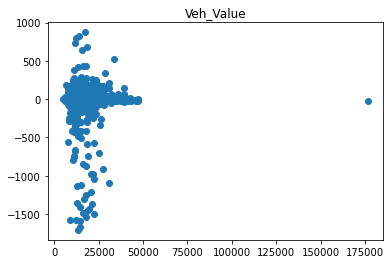

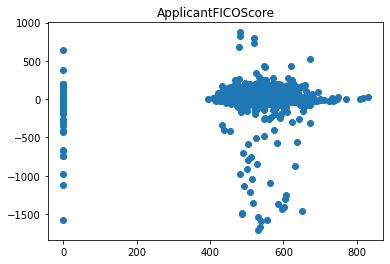

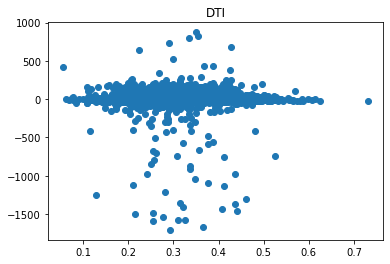

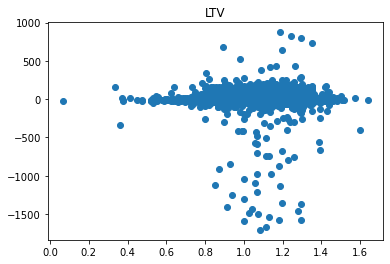

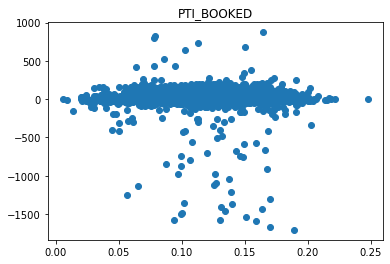

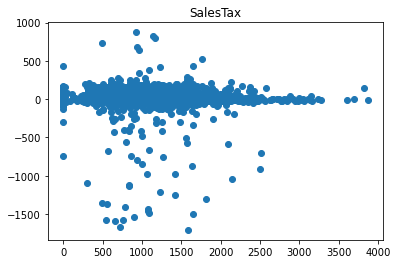

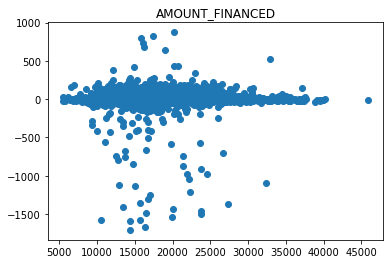

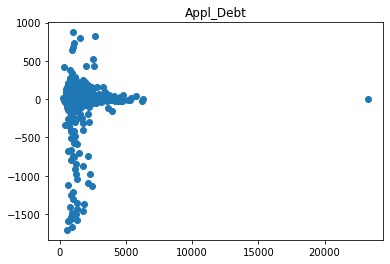

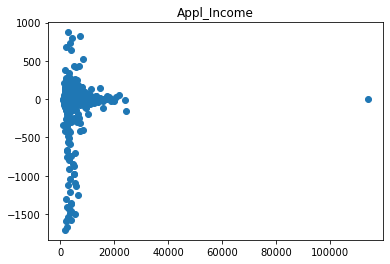

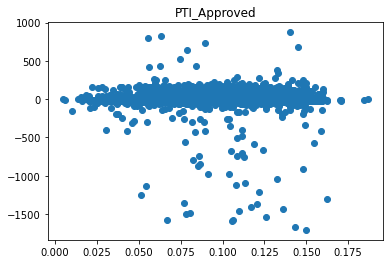

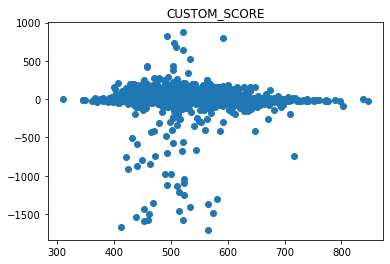

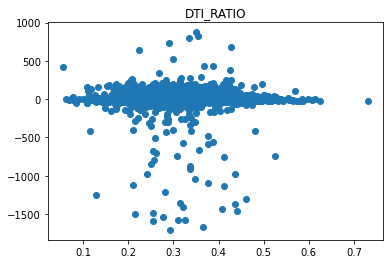

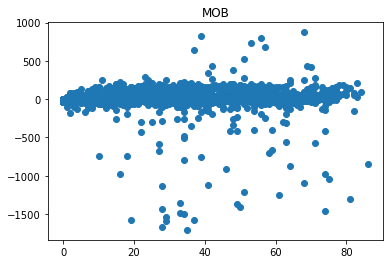

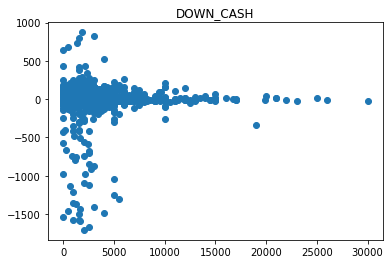

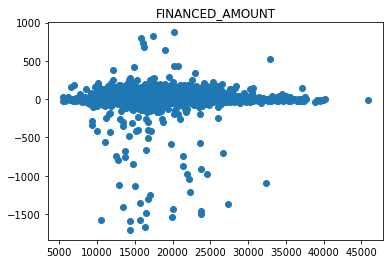

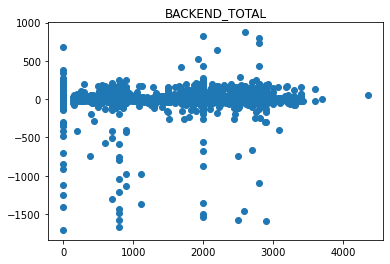

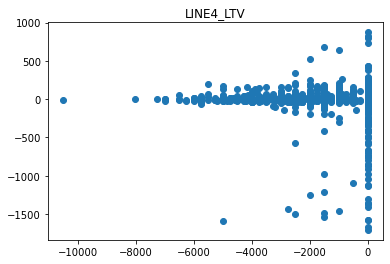

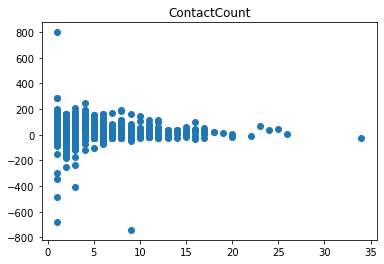

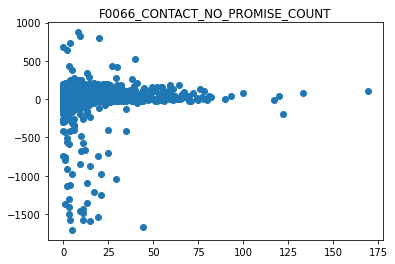

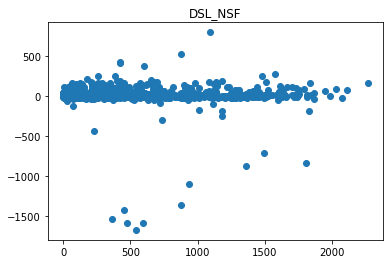

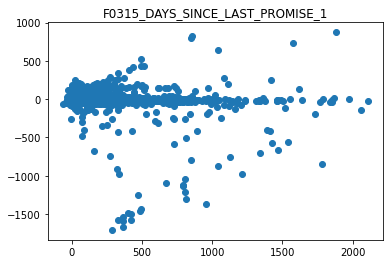

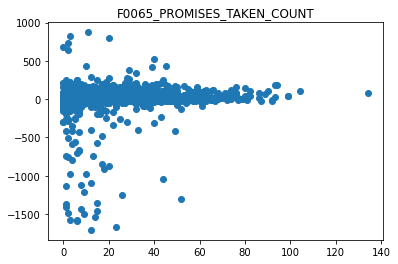

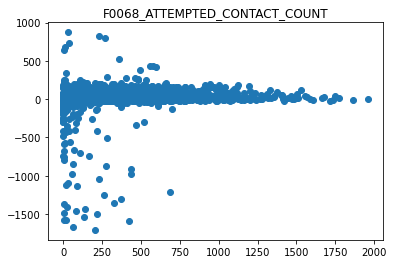

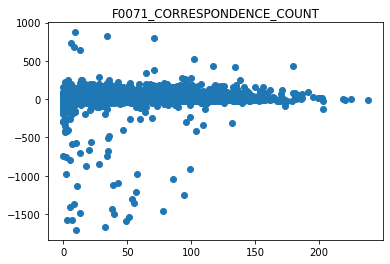

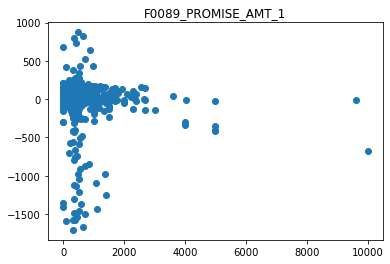

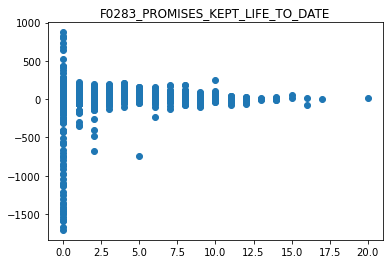

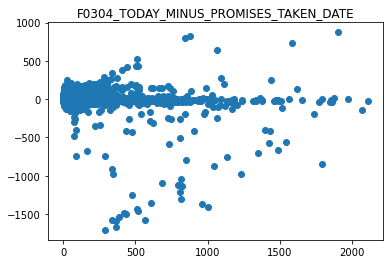

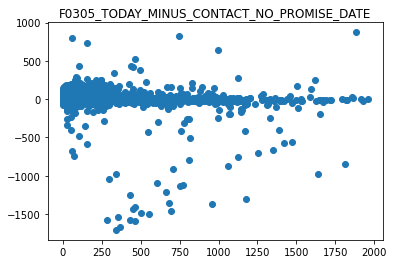

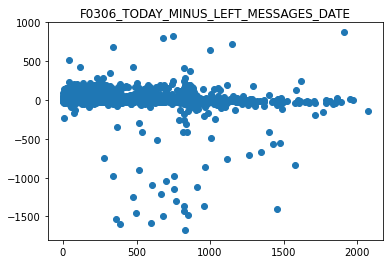

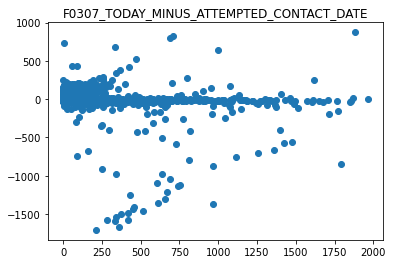

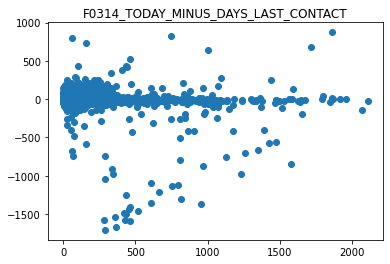

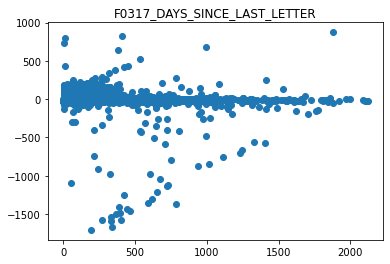

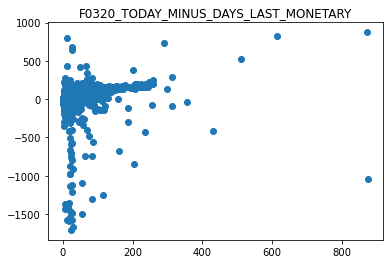

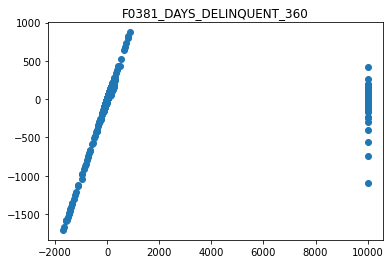

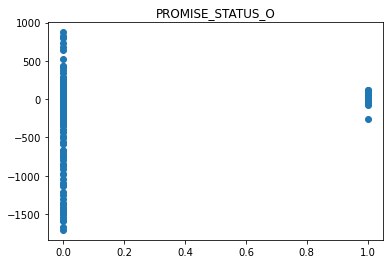

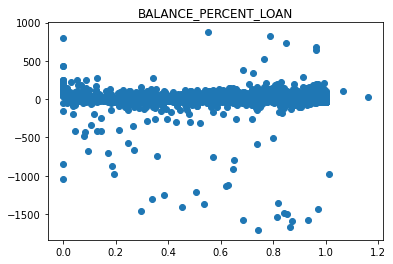

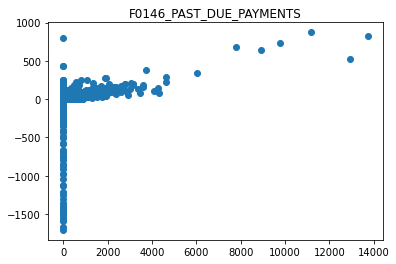

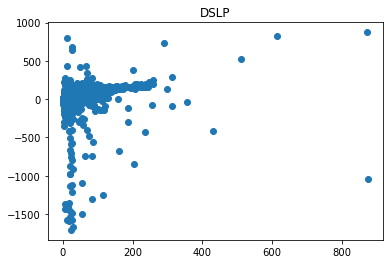

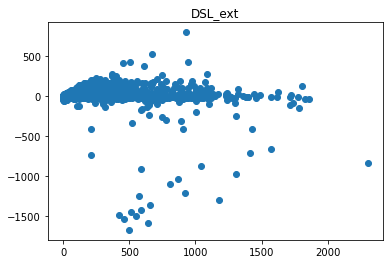

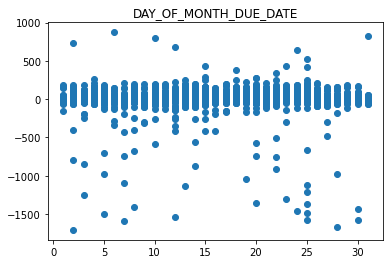

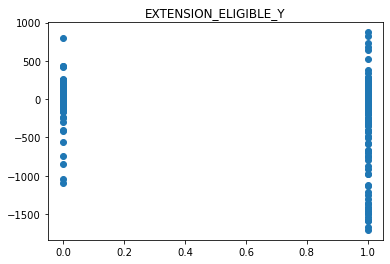

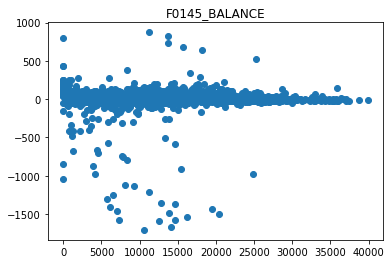

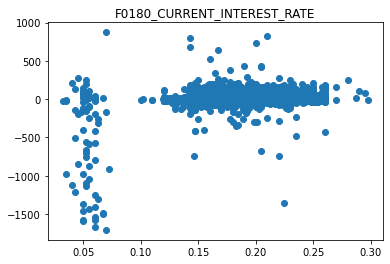

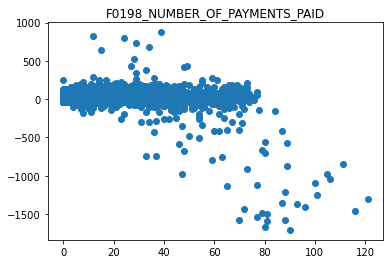

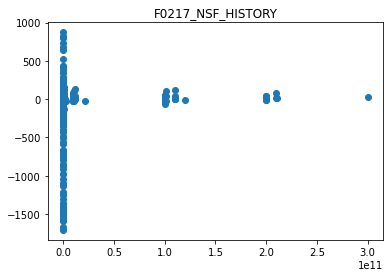

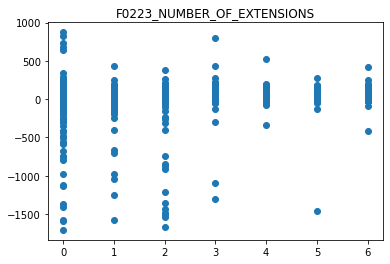

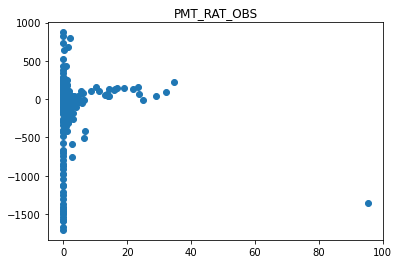

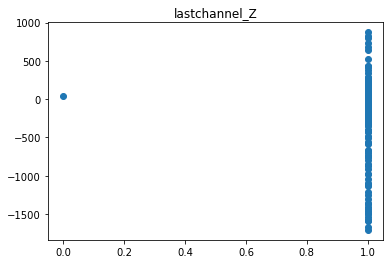

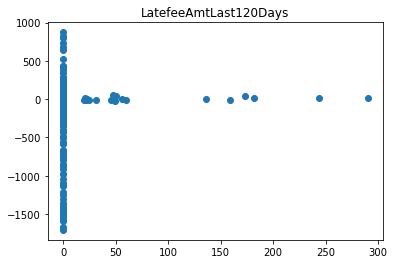

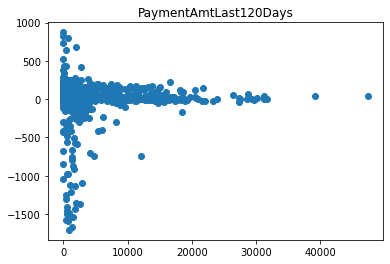

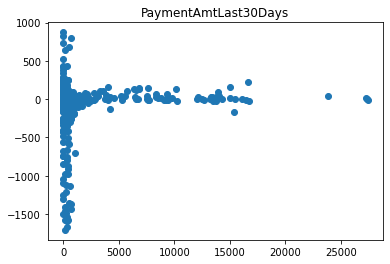

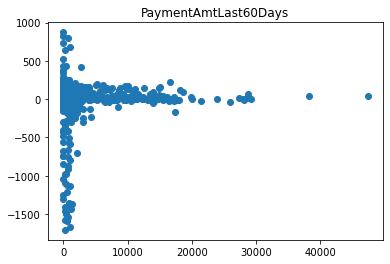

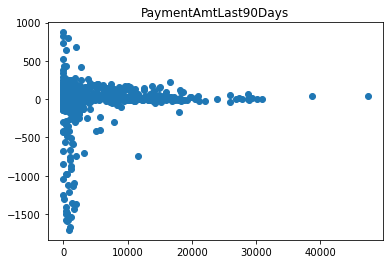

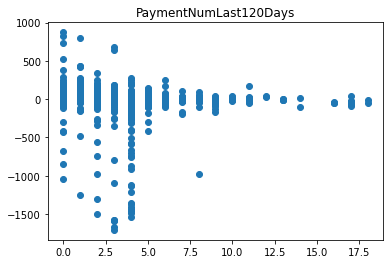

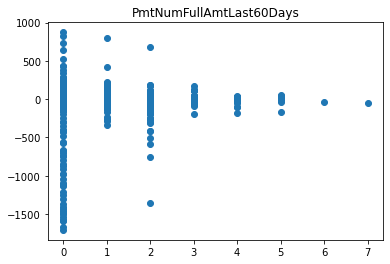

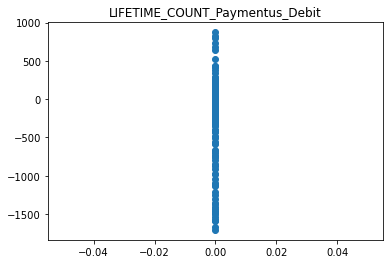

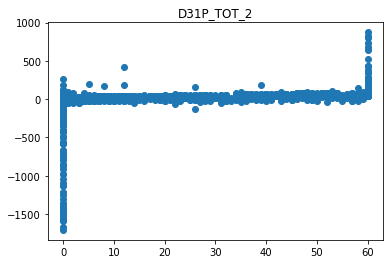

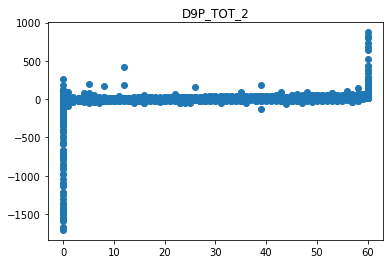

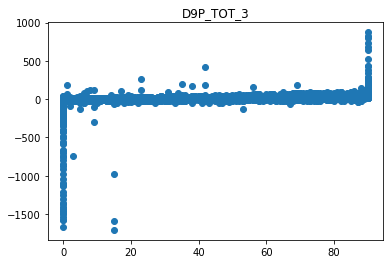

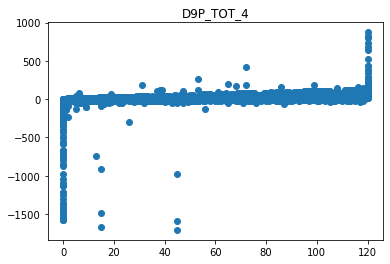

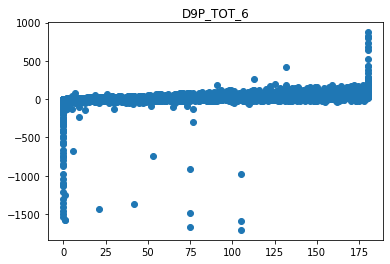

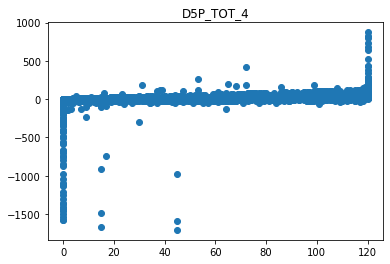

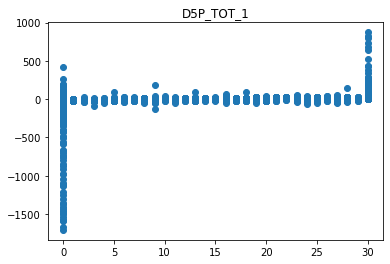

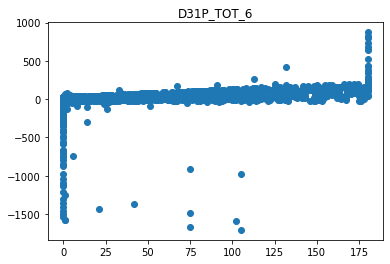

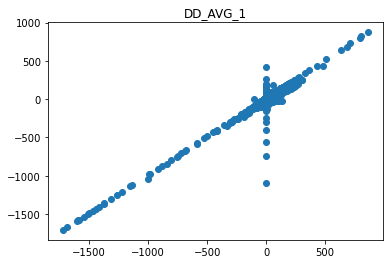

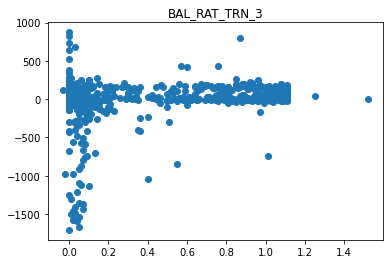

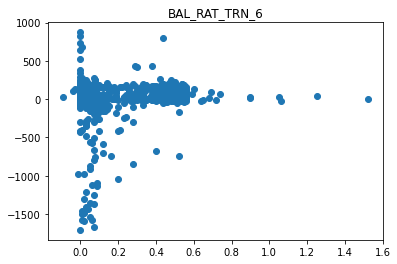

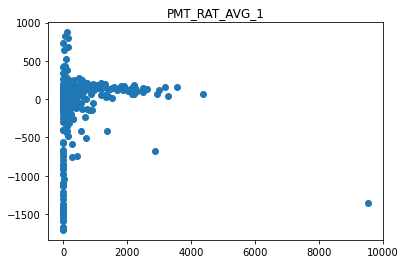

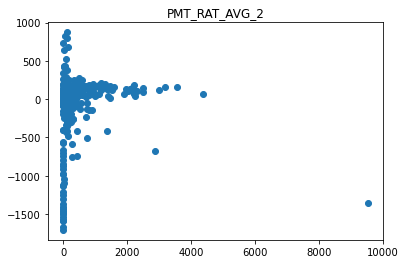

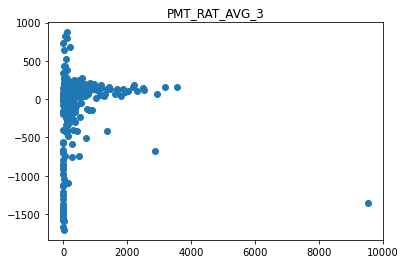

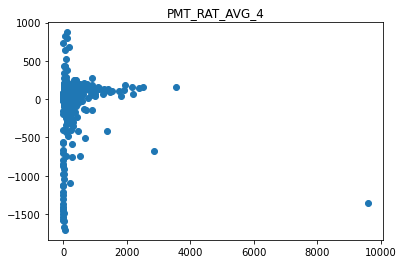

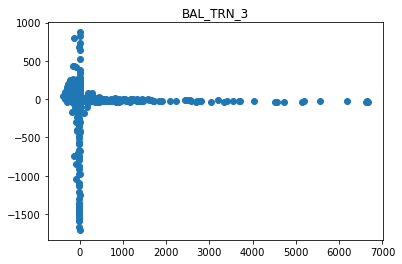

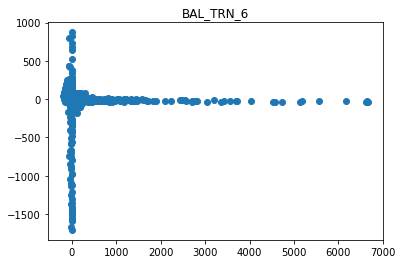

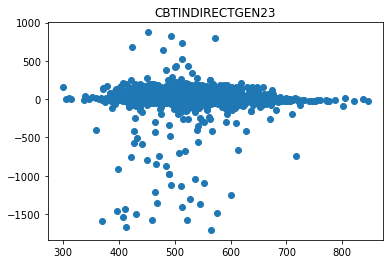

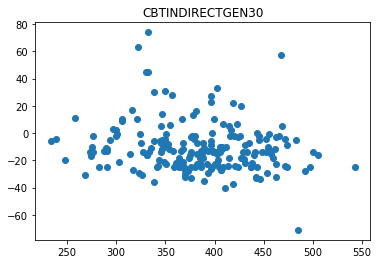

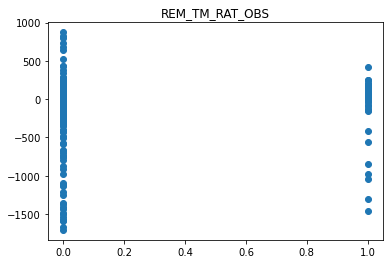

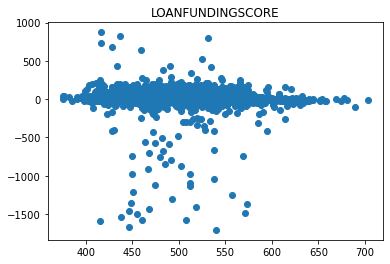

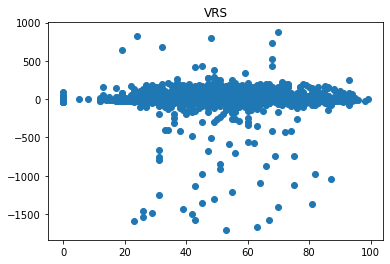

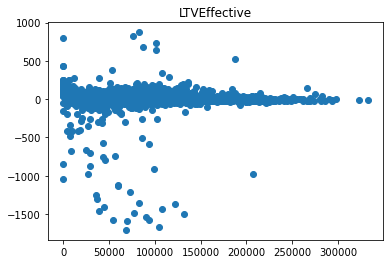

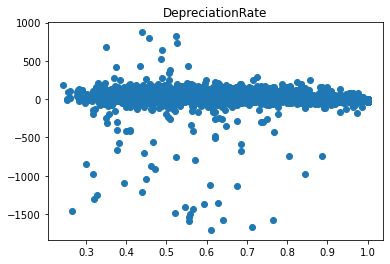

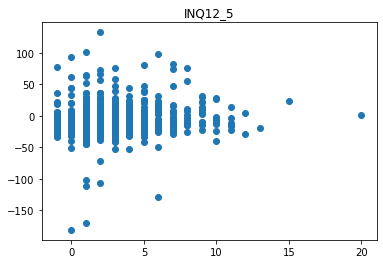

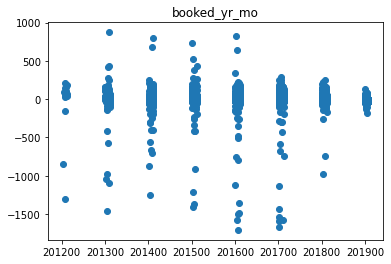

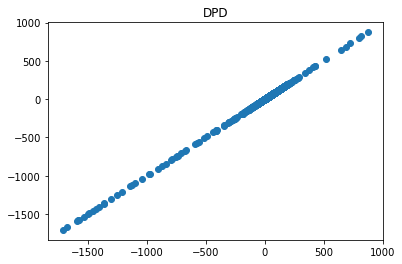

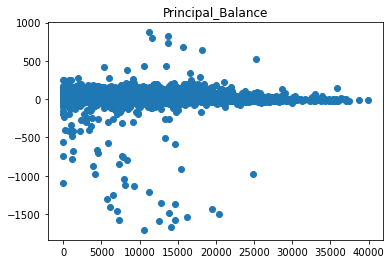

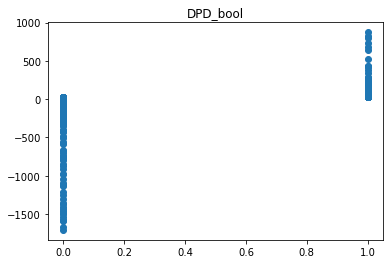

In [41]:
scatter_plots={}
for col in merge_df.columns :
    scatter_plots[col]=px.scatter(data_frame=merge_df.sample(5000),x=col,y="DPD")

df = merge_df.sample(5000)
df=df.drop(columns=df.select_dtypes(include='object').columns)
for col in df.columns:
    plt.scatter(df[col] ,df["DPD"])
    plt.title(col)
    plt.show()


In [42]:
scatter_plots={}
for col in imp_column :
    fig=px.box(merge_df,x="DPD_bool")
    fig.show()

##  From above graphs and inferences we are selecting the following columns for our modelling in next stages to predict the column DPD_bool

### Conclusion Columns
- Promise Status_O
- Extension eligible_Y 
- Number of extensions_FO223
- last_channel_Z
-  REM_TM_RAT_OBS
- Applicant FICO (IMP)
- Appl_Debt (Graph check req)
- F0066_CONTACT_NO_Promise_count
- F0315_Days since last promise
- F00665_Promises_Taken_Count
- F0068_Attempted_Contact_Count
- F0071_Correspondance count (Column similar to the above one)
- F0305_TODAY_MINUS
- F0306_TODAY_MINUS_LEFT
- F0314_TODAY_MINUS_LAST_CONTACT
- F0317_Days_since_last_letter
- F0320_Today_MINUS_LAST_Monetary
- F0381_DAYS_DELIQUENT_360
- BALANCE_PERCENT_LOAN
- F_0146_PAST_DUE
- DSLP
- F0223_Number_of_extensions
- PMT_RAT_OBS(Optional)
- PaymentAmtLast60Days
- PaymentAmtLast90Days
- PaymentNumLast120Days
- PaymentNumFullAmtLast60Days
- D5P_TOT_1
- D31P_TOT_6
- DD_AVG_1
- BAL_TRN_6
- CBTINDIRECTGEN23
- CBTINDIRECTGEN30
- LOANFUNDINGSCORE
- LTVEffective
- DepreciationRate



### Intuition columns:

- Appl_Income
- PTI
- Sales_Tax
- DOWN_CASH
- Financed_Amount
- DSL_NSF
- F0089_Promise_AMT_1
- DSL_ext
- F0180_Current_Interest_rate
- BAL_RAT_TRN_6



In [37]:
selected_cols_df = pd.read_excel("../columns_new.xlsx",header=None)
final_df =merge_df[list(selected_cols_df[0])+["DPD_bool"]]
final_df

PROMISE_STATUS_O  EXTENSION_ELIGIBLE_Y  F0223_NUMBER_OF_EXTENSIONS  \
0                   0.0                   0.0                         3.0   
1                   0.0                   1.0                         0.0   
2                   0.0                   1.0                         0.0   
3                   1.0                   0.0                         2.0   
4                   0.0                   1.0                         0.0   
...                 ...                   ...                         ...   
63003               NaN                   NaN                         NaN   
63004               NaN                   NaN                         NaN   
63005               NaN                   NaN                         NaN   
63006               NaN                   NaN                         NaN   
63007               NaN                   NaN                         NaN   

       lastchannel_Z  REM_TM_RAT_OBS  ApplicantFICOScore  Appl_Debt  \
0                1.0             0.0                 0.0    1075.05   
1                1.0             0.0                 0.0    1138.75   
2                1.0             0.0               551.0     767.83   
3                1.0             0.0               468.0    1071.20   
4                1.0             0.0               523.0     726.64   
...              ...             ...                 ...        ...   
63003            NaN             NaN                 NaN        NaN   
63004            NaN             NaN                 NaN        NaN   
63005            NaN             NaN                 NaN        NaN   
63006            NaN             NaN                 NaN        NaN   
63007            NaN             NaN                 NaN        NaN   

       F0066_CONTACT_NO_PROMISE_COUNT  F0315_DAYS_SINCE_LAST_PROMISE_1  \
0                                12.0                              5.0   
1                                 3.0                             45.0   
2                                 0.0                              3.0   
3                                14.0                            -11.0   
4                                 2.0                             80.0   
...                               ...                              ...   
63003                             NaN                              NaN   
63004                             NaN                              NaN   
63005                             NaN                              NaN   
63006                             NaN                              NaN   
63007                             NaN                              NaN   

       F0065_PROMISES_TAKEN_COUNT  F0068_ATTEMPTED_CONTACT_COUNT  \
0                            25.0                          260.0   
1                             3.0                            1.0   
2                             3.0                            0.0   
3                            10.0                           52.0   
4                             7.0                           12.0   
...                           ...                            ...   
63003                         NaN                            NaN   
63004                         NaN                            NaN   
63005                         NaN                            NaN   
63006                         NaN                            NaN   
63007                         NaN                            NaN   

       F0071_CORRESPONDENCE_COUNT  F0305_TODAY_MINUS_CONTACT_NO_PROMISE_DATE  \
0                            22.0                                       21.0   
1                             9.0                                       47.0   
2                             2.0                                        NaN   
3                            21.0                                      101.0   
4                             5.0                                       14.0   
...                           ...          

In [38]:
final_df.to_csv("../final_data_to_clean.csv",index=False)